In [73]:
from glob import glob
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
path = './COVID_19_XRAY/'
train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')
labels_path = os.path.join(path, 'train/labels.csv')

In [11]:
print('train:', len(glob(train_path + '/*.png'))) # 2000
print('test:', len(glob(test_path + '/*.png')))

train: 0
test: 400


In [12]:
labels = pd.read_csv(labels_path)

In [13]:
labels.head(5)

,filename,label
0,image_001.png,covid
1,image_002.png,covid
2,image_003.png,normal
3,image_004.png,normal
4,image_005.png,normal


In [14]:
labels.tail(5)

,filename,label
1995,image_1996.png,covid
1996,image_1997.png,normal
1997,image_1998.png,covid
1998,image_1999.png,normal
1999,image_2000.png,normal


In [15]:
for i in range(len(labels)):
    if labels['label'][i] == 'covid':
        f = train_path + '/' + labels['filename'][i]
        try:
            shutil.move(f, os.path.join(path, 'img_covid'))
        except:
            pass
    else:
        f = train_path + '/' + labels['filename'][i]
        try:
            shutil.move(f, os.path.join(path, 'img_normal'))
        except:
            pass

In [16]:
train_covid = os.path.join(path, 'img_covid')
train_normal = os.path.join(path, 'img_normal')
train_covid_files = os.listdir(train_covid)
train_normal_files = os.listdir(train_normal)

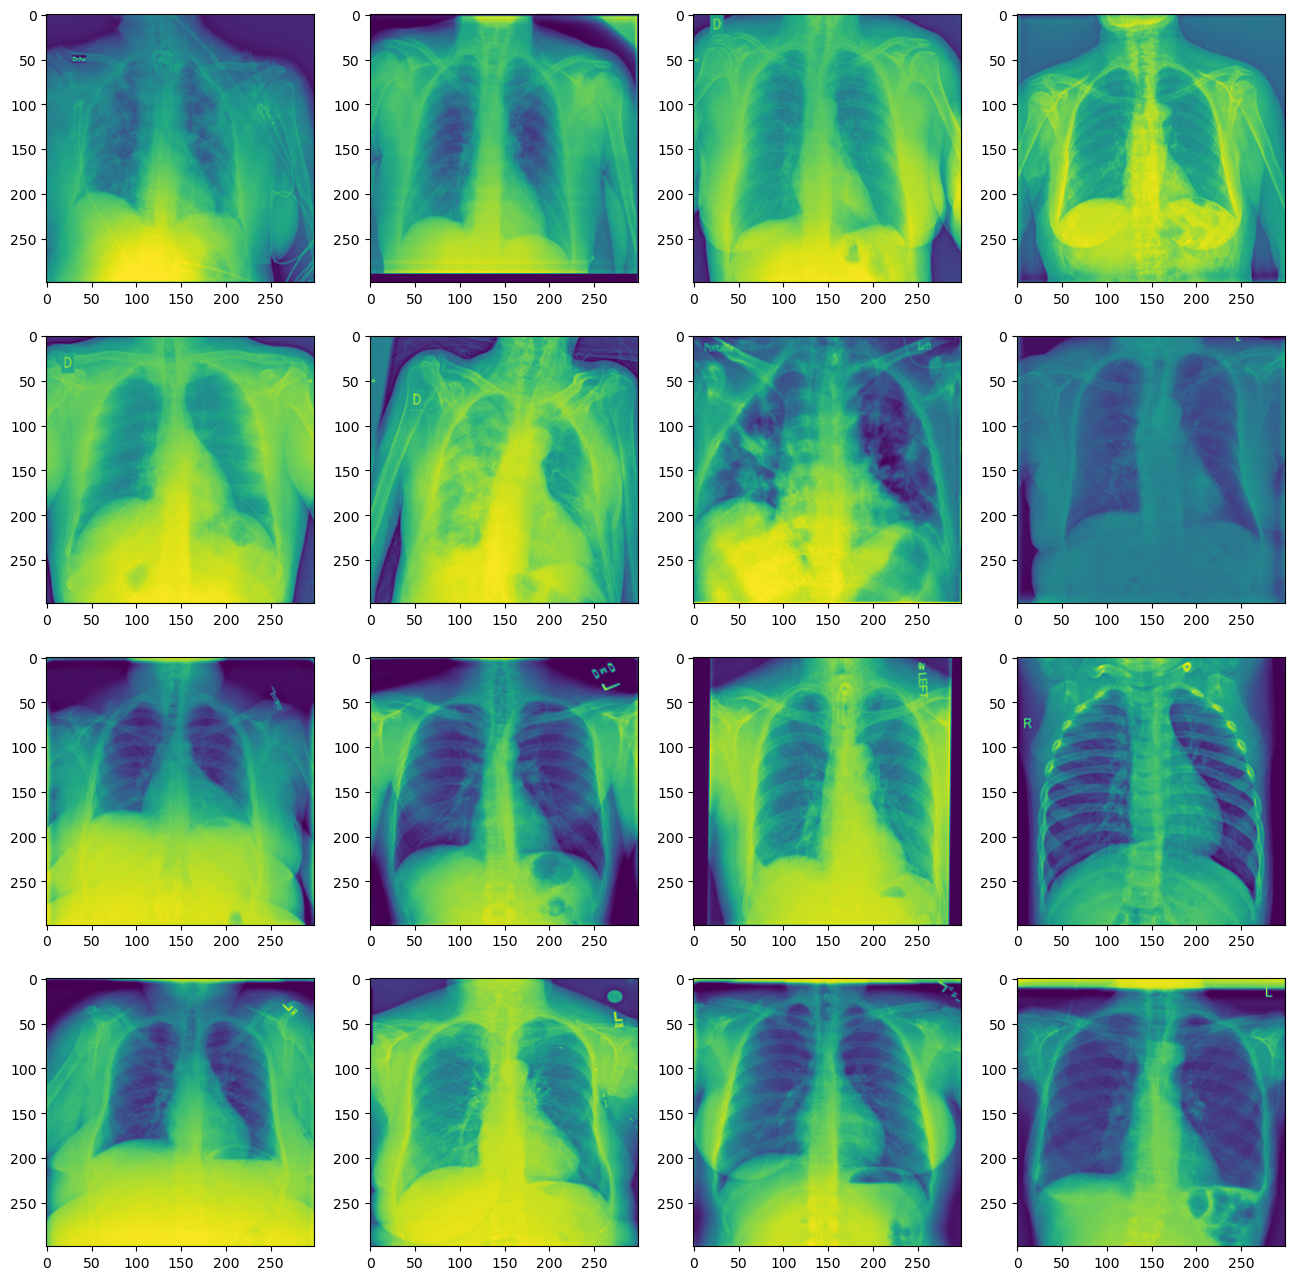

In [17]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_covid_pix = [os.path.join(train_covid, fname) for fname in train_covid_files[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(train_normal, fname) for fname in train_normal_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pix+next_normal_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('On')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [20]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    # 512 Neuron (Hidden layer)
    tf.keras.layers.Dense(512, activation='relu'),
    # 1 Output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [23]:
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './COVID_19_XRAY/img/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [75]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

In [77]:
hist_list = []
MODEL_DIR = './model/'   #같은 폴더 내에 model이라는 폴더가 없다면 만들어줘라
if not os.path.exists(MODEL_DIR):      
    os.makedirs(MODEL_DIR)    #mkdir이 폴더 생성 함수

# 모델 저장 조건 설정
modelpath = MODEL_DIR+'{epoch:02d}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='loss', verbose = 1, save_best_only = True)

hist_list.append(model.fit(train_generator,steps_per_epoch=8,epochs=30,verbose=1,callbacks=[early_stop, checkpointer]))

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9314
Epoch 1: loss improved from inf to 0.20554, saving model to ./model\01.hdf5
8/8 [==============================] - 32s 4s/step - loss: 0.2055 - accuracy: 0.9314
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9898
Epoch 2: loss improved from 0.20554 to 0.03750, saving model to ./model\02.hdf5
8/8 [==============================] - 35s 5s/step - loss: 0.0375 - accuracy: 0.9898
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9980
Epoch 3: loss improved from 0.03750 to 0.01819, saving model to ./model\03.hdf5
8/8 [==============================] - 40s 5s/step - loss: 0.0182 - accuracy: 0.9980
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9961
Epoch 4: loss did not improve from 0.01819
8/8 [==============================] - 41s 5s/step - loss: 0.0198 - accuracy: 0.9961
Epoch 5/30
8/

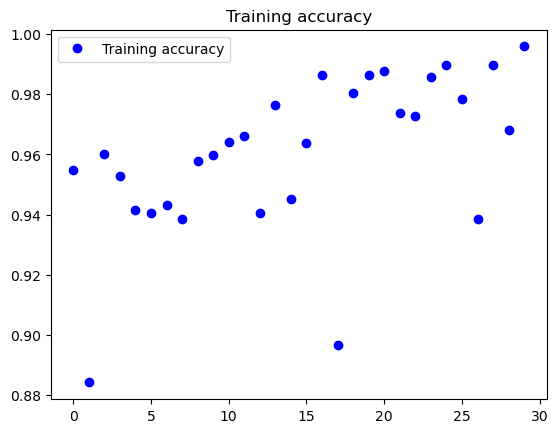

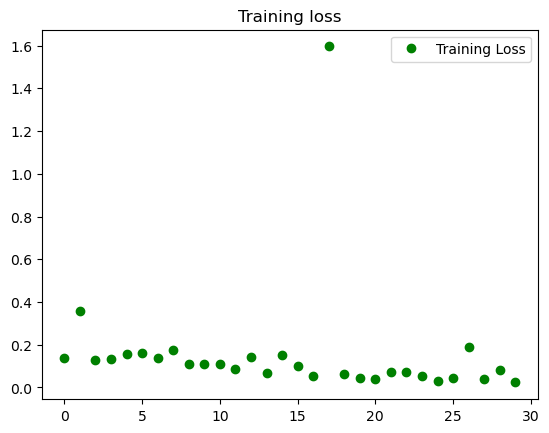

In [37]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [38]:
submission = pd.read_csv('submission.csv')

In [39]:
submission

,filename,label
0,image_001.png,NaN
1,image_002.png,NaN
2,image_003.png,NaN
3,image_004.png,NaN
4,image_005.png,NaN
...,...,...
395,image_396.png,NaN
396,image_397.png,NaN
397,image_398.png,NaN
398,image_399.png,NaN


In [54]:
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [300, 300])

In [55]:
test_feature = []
for index, row in submission.iterrows():
    img = tf.io.read_file(test_path + '/' + f"{row['filename']}")
    img = decode_img(img)
    test_feature.append(img)

test_feature = np.array(test_feature)

In [56]:
def predict(model, data):
    predicted = model.predict(data)
    predicted[(predicted > 0.5)] = 1
    predicted[(predicted <= 0.5)] = 0
    return predicted

In [80]:
model = tf.keras.models.load_model('model/08.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [87]:
submission['label'] = predict(model, test_feature)
submission['label'].replace([0, 1], ['covid', 'normal'], inplace=True)

13/13 [==============================] - 3s 229ms/step


In [88]:
submission

,filename,label
0,image_001.png,covid
1,image_002.png,covid
2,image_003.png,normal
3,image_004.png,covid
4,image_005.png,normal
...,...,...
395,image_396.png,normal
396,image_397.png,normal
397,image_398.png,normal
398,image_399.png,normal


In [89]:
submission.to_csv('temp1.csv', index=False)